
# Intro

My first attempt at a kaggle competition. This time tackling the titanic dataset.

Built by Nicholas Axl

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from matplotlib import rcParams

import os
for dirtname, _, filenames in os.walk('/sample_data'):
  for filename in filenames:
          print(os.path.join(dirname, filename))

In [14]:
train_data = pd.read_csv("./sample_data/train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_data = pd.read_csv("./sample_data/test.csv")
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Double checking for missing columns


In [16]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
print(len(df_train.columns))
print(len(df_test.columns))

12
11


Exploratory Data Analysis

In [17]:
train_data.shape

(891, 12)

In [18]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Fixing Missing Data

C:\Users\Axl\AppData\Local\Temp\ipykernel_24104\158391692.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='Blues_r')


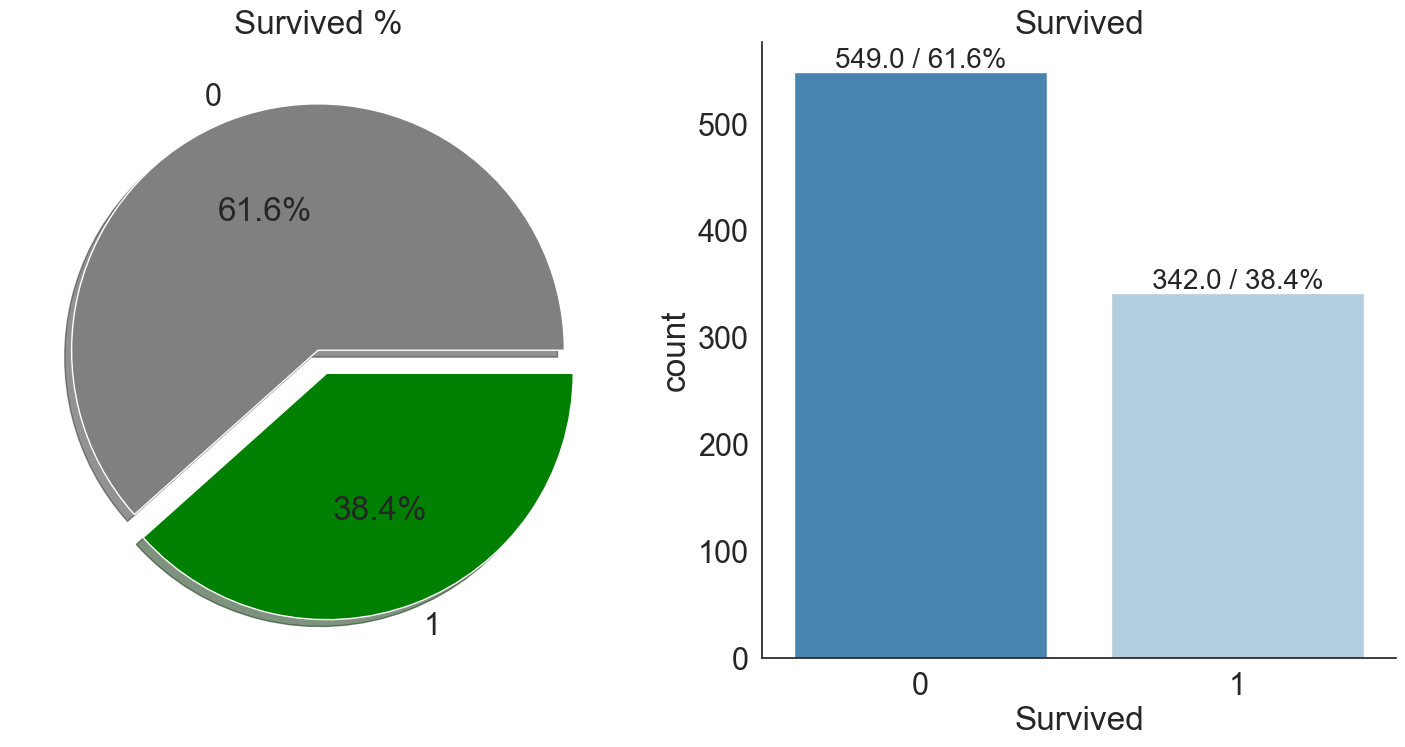

In [22]:
total_cnt = train_data['Survived'].count()
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_data['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train_data, palette='Blues_r')
ax[1].set_title('Survived')
for p in ax[1].patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax[1].text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

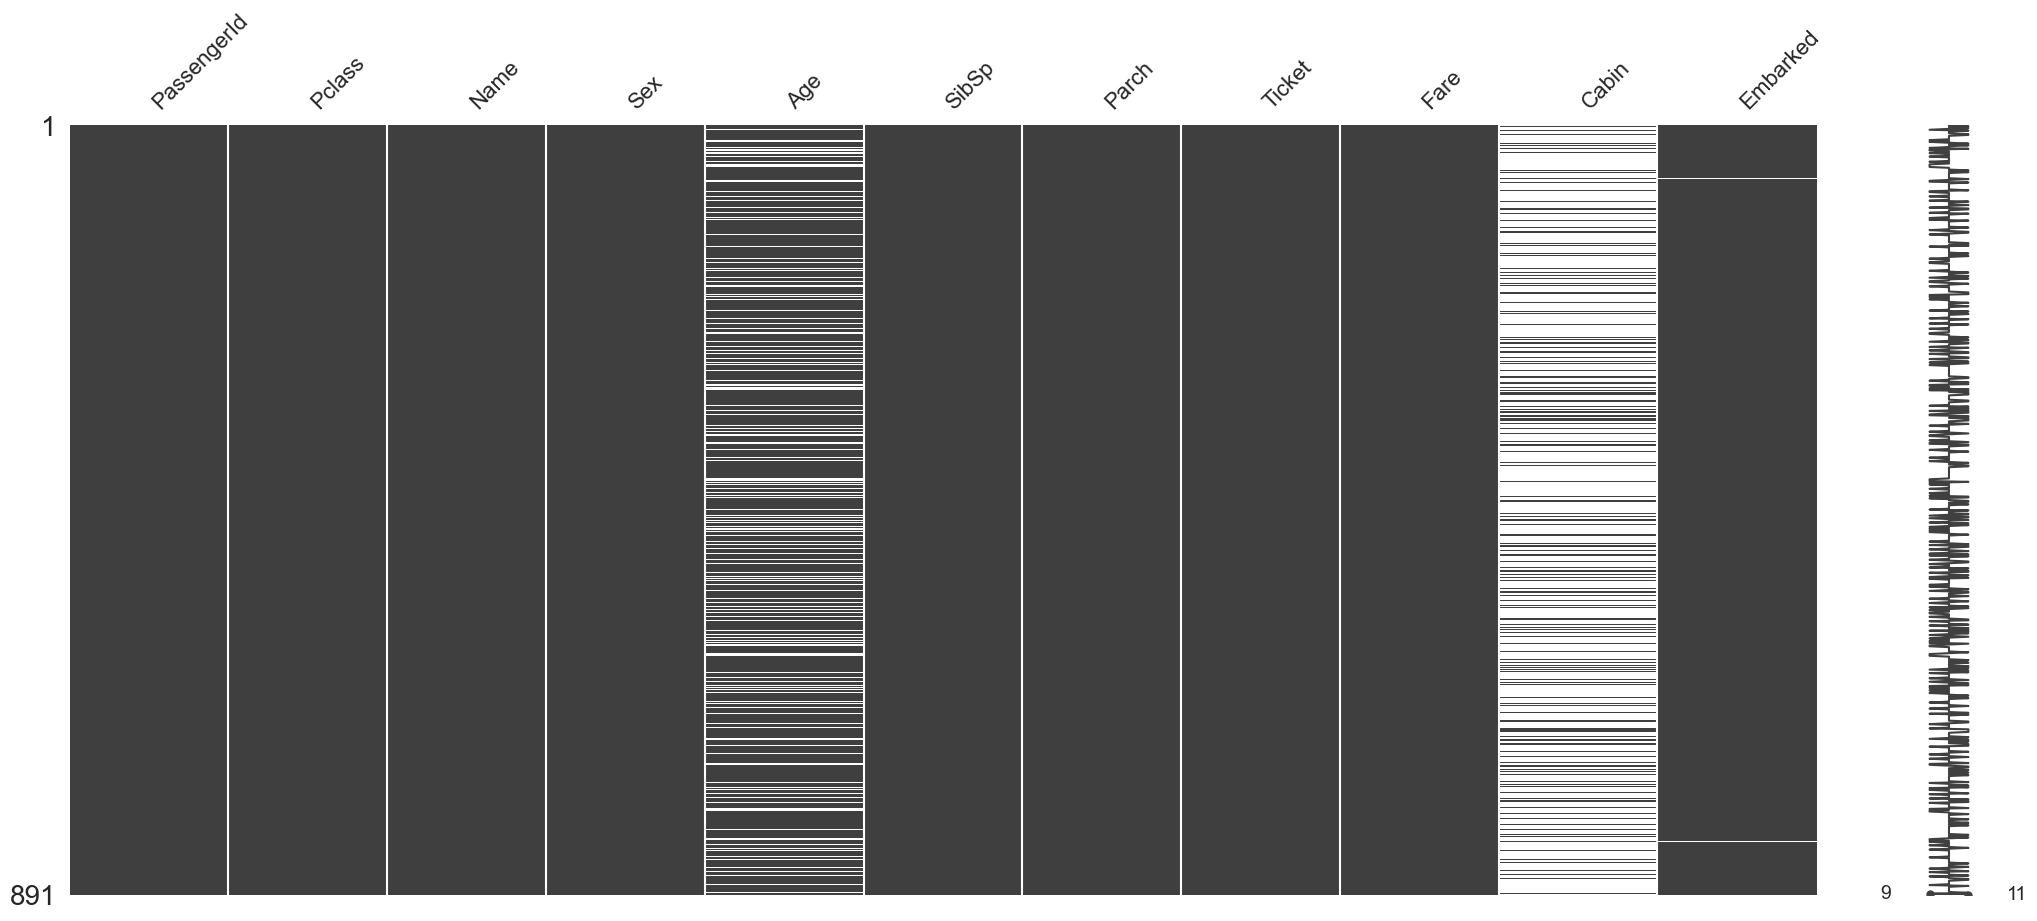

In [23]:
import missingno as msno
msno.matrix(train_data.drop(['Survived'],axis=1))
train_data.drop(['Survived'],axis=1).isnull().sum()

Exploring the Age column

Age mean: 29.70, std: 14.53, skew: 0.39


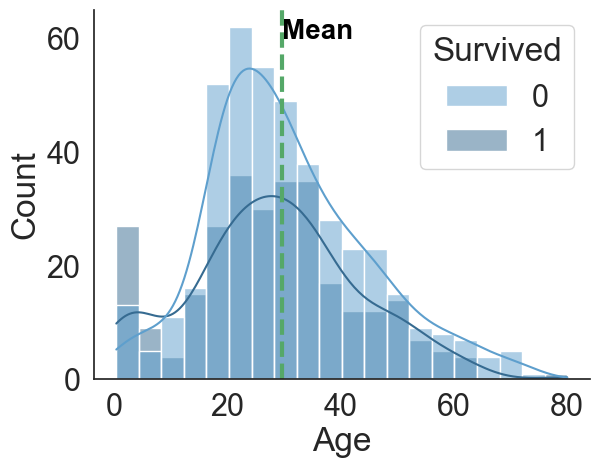

In [24]:
ax = sns.histplot(x="Age", hue="Survived", data=train_data,palette = 'Blues_d',kde=True)
plt.axvline(x=train_data['Age'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(train_data['Age'].mean(), 60, "Mean", horizontalalignment='left', size='small', color='black', weight='semibold')
sns.despine()
age_mean = train_data['Age'].mean()
age_std = train_data['Age'].std()
age_skew = train_data['Age'].skew()
print('Age mean: {:.2f}, std: {:.2f}, skew: {:.2f}'.format(age_mean, age_std, age_skew))

In [30]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data[['Age_mean']] = imp.fit_transform(train_data[['Age']])
plt.subplot(1,2,1)

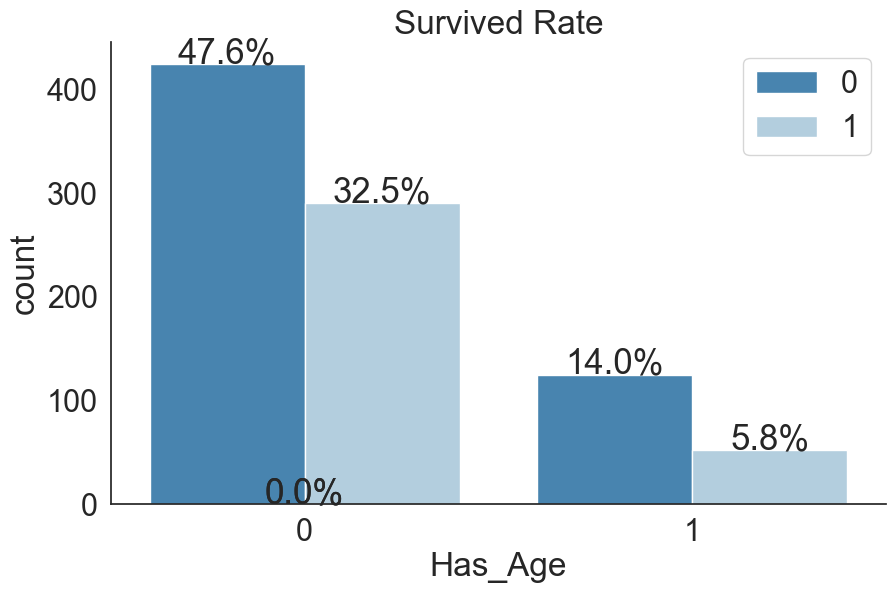

In [42]:
train_data['Age'].isnull().sum()
train_data['Has_Age'] = train_data['Age'].isnull().astype(int)
rcParams['figure.figsize'] = 10,6
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
ax = sns.countplot(x='Has_Age',hue ='Survived',data=train_data,palette="Blues_r")
plt.legend(loc = 'upper right')
ax.set_title('Survived Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10,f'{height / total_cnt * 100:2.1f}%',va='center', ha='center', size=25)
sns.despine()

Attempt to use sklearn's multivariate feature imputation

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
train_data[['Age_iter']] = imp.fit_transform(train_data[['Age']])
pd.concat([train_data['Age'], train_data['Age_iter']], axis=1).head(10)

,Age,Age_iter
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
5,NaN,29.699118
6,54.0,54.000000
7,2.0,2.000000
8,27.0,27.000000
9,14.0,14.000000


Imputations for Cabin

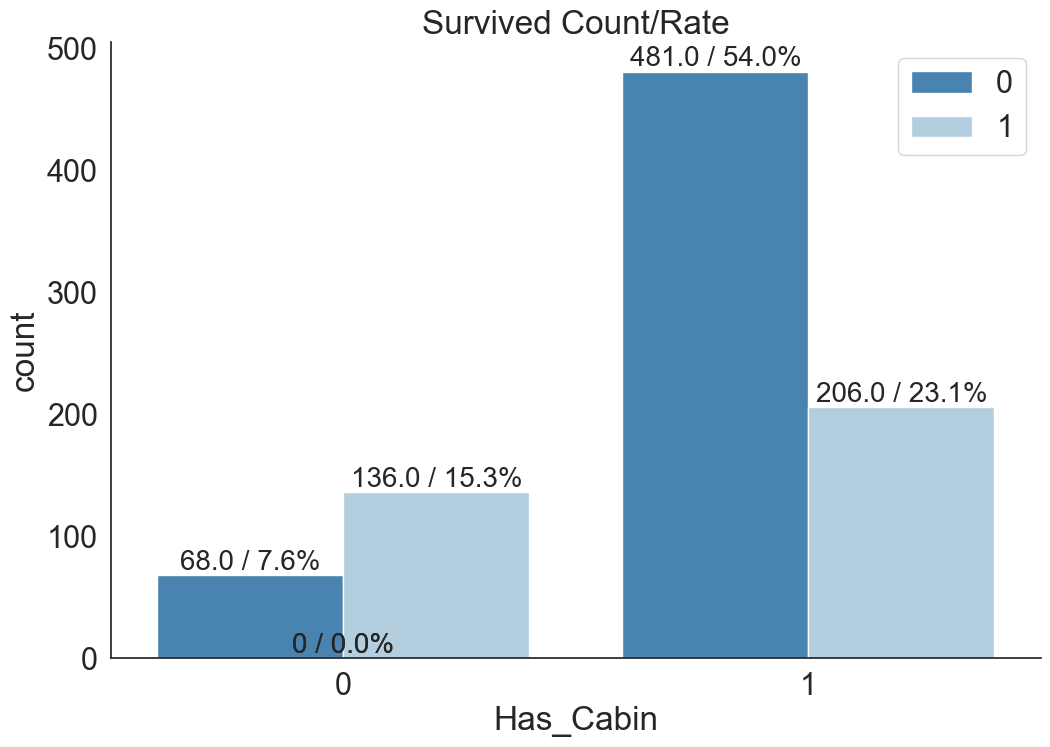

In [47]:
train_data['Has_Cabin'] = train_data['Cabin'].isnull().astype(int)
total_cnt = train_data['Survived'].count()
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(x="Has_Cabin",
                   hue="Survived", 
                   data=train_data,
                   palette = 'Blues_r')
ax.set_title('Survived Count/Rate')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

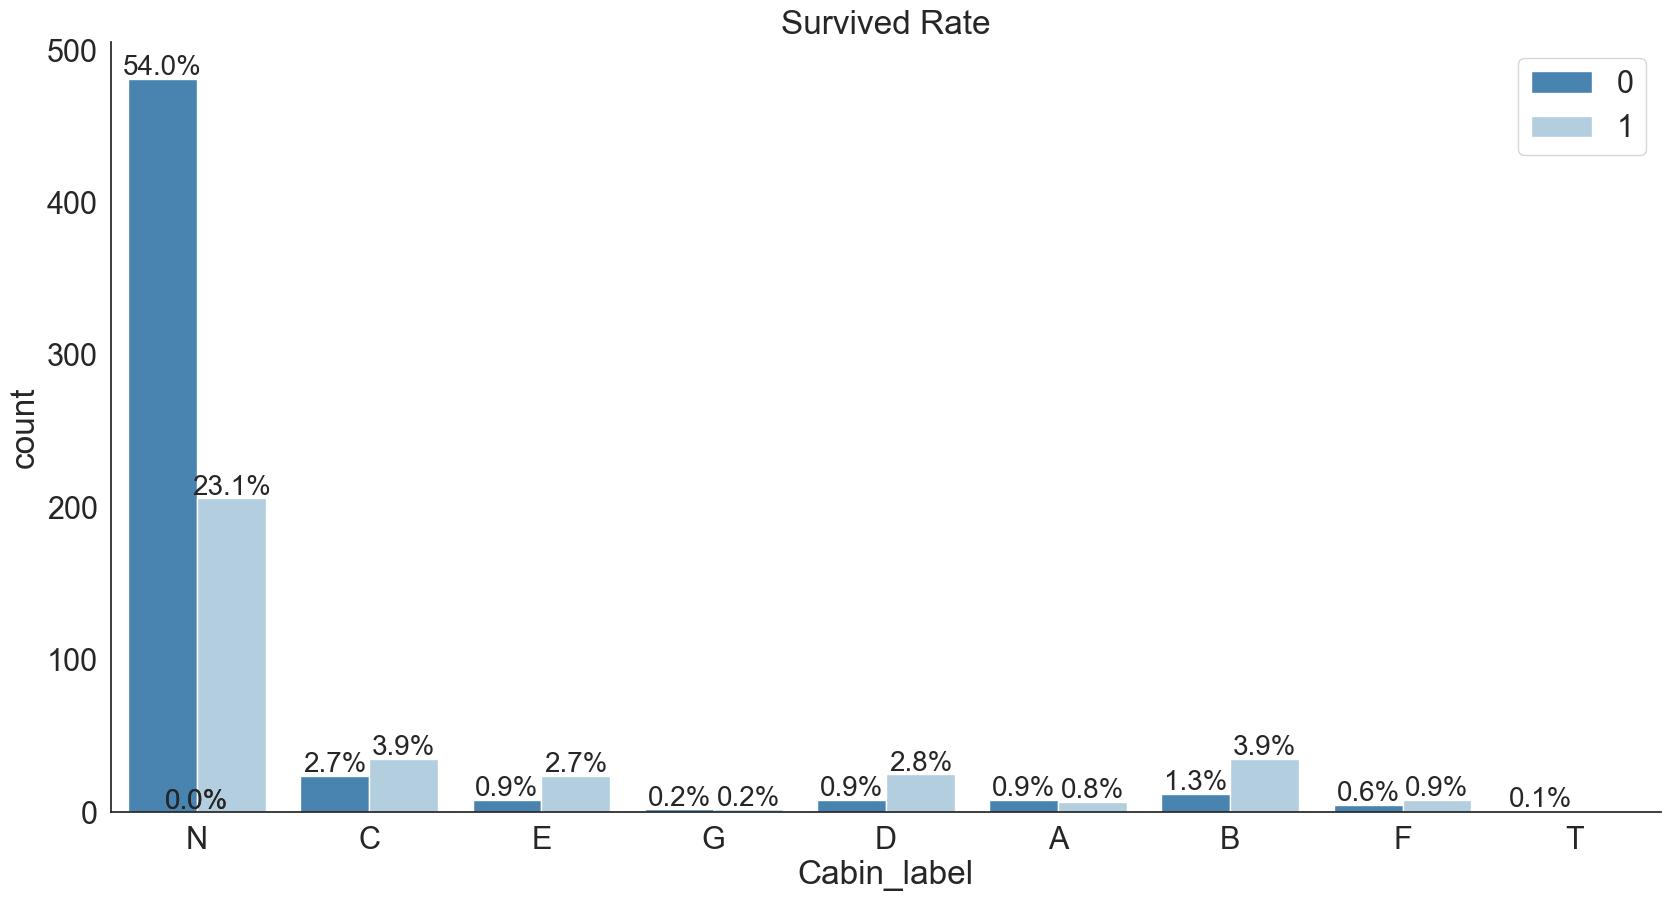

In [50]:
rcParams['figure.figsize'] = 20,10
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(x="Cabin_label", hue="Survived", data=train_data,palette = 'Blues_r')
ax.set_title('Survived Rate')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height / total_cnt * 100:2.1f}%',va='center', ha='center', size=20)
sns.despine()